# Plot loss during training
From training the VAE with the KLD loss.

In [29]:
import torch
from matplotlib import pyplot as plt
import tikzplotlib
import numpy as np

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {DEVICE} device")

Using cpu device


Downloading data from the traning

In [30]:
save_model_path ="/Users/Alex/Documents/results/plotables/VAE_CIFAR100.pth"

losses      = torch.load(save_model_path, map_location=torch.device(DEVICE))
num_epochs  = losses['train_loss'].shape[1]
train_loss  = losses['train_loss']
val_loss    = losses['val_loss']


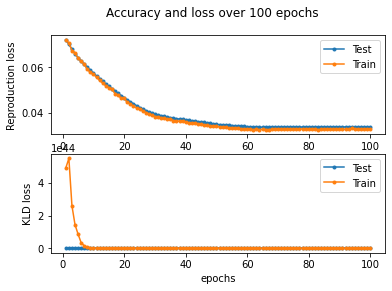

In [31]:
xVals = list(range(1, num_epochs + 1))
KLD_scale = np.exp((np.asarray(xVals)-np.ones_like(xVals)) - len(xVals))/4

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle(f"Accuracy and loss over {num_epochs} epochs")
ax1.plot(xVals, train_loss[0], '.-', label="Test")
ax1.plot(xVals, val_loss[0], '.-', label="Train")
ax1.legend()
ax1.set_ylabel("Reproduction loss")

ax2.plot(xVals, train_loss[1]/KLD_scale, '.-', label="Test")
ax2.plot(xVals, val_loss[1]/KLD_scale, '.-', label="Train")
ax2.legend()
ax2.set_xlabel("epochs")
ax2.set_ylabel("KLD loss")

plt.show()

# Plot without KLD loss

In [32]:
save_model_path ="/Users/Alex/Documents/GitHub/BachelorProject_XAI/plottables/VAE_CIFAR100_noKLD.pth"

lossesN      = torch.load(save_model_path, map_location=torch.device(DEVICE))
num_epochs  = len(lossesN['train_loss'])
train_lossN  = lossesN['train_loss']
val_lossN    = lossesN['val_loss']

print(num_epochs)
print(len(train_lossN))

150
150


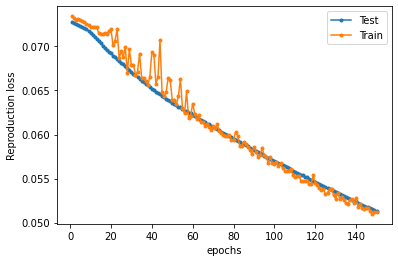

In [33]:
xVals = list(range(1, num_epochs + 1))
plt.plot(xVals, train_lossN, '.-', label="Test")
plt.plot(xVals, val_lossN, '.-', label="Train")
plt.xlabel("epochs")
plt.ylabel("Reproduction loss")
plt.legend()
plt.show()